In [1]:
using GeometricIntegrators
using GeometricIntegrators.TestProblems.Oscillator

In [2]:
using Plots

In [3]:
const Δt = 0.5
#const nt = 1000
const nt = 100000
;

In [4]:
#set_config(:nls_nmin, 1)
set_config(:nls_atol, 2eps())
set_config(:nls_rtol, 2eps())
set_config(:nls_stol_break, 1E3)
;

In [5]:
function compute_energy_error(t, q::DataSeries{T}) where {T}
    h = SDataSeries(T, q.nt)
    e = SDataSeries(T, q.nt)

    for i in axes(q,2)
        h[i] = hamiltonian(t[i], q[:,i])
        e[i] = (h[i] - h[0]) / h[0]
    end

    (h, e)
end

compute_energy_error (generic function with 1 method)

In [6]:
ode = oscillator_ode()
int = IntegratorPGLRK(ode, getCoefficientsPGLRK(3), Δt)
sol = Solution(ode, Δt, nt)
integrate!(int, sol)
;

    i=   5,   rₐ=3.12550111e-10,   rᵣ=9.04475298e-09,   rₛ=1.07186481e-04


In [7]:
H, ΔH = compute_energy_error(sol.t, sol.q)
;

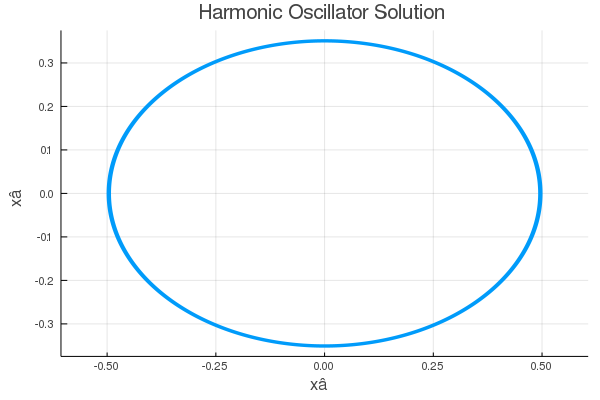

In [8]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Harmonic Oscillator Solution", aspectratio=1, fmt=:png)

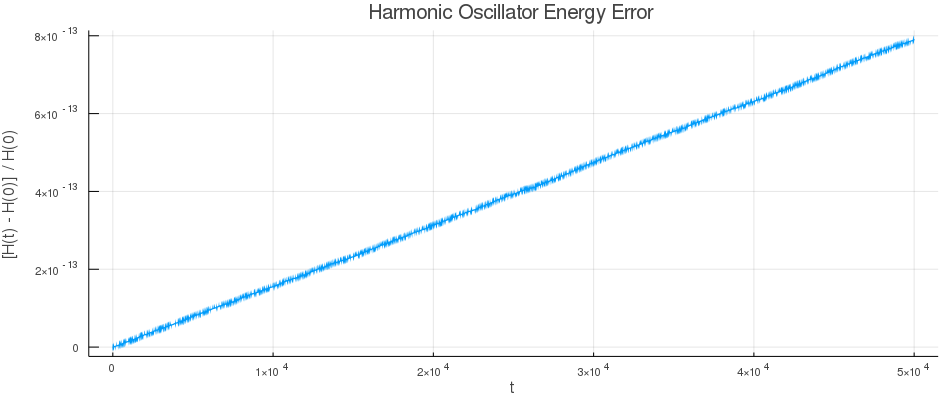

In [9]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Harmonic Oscillator Energy Error", size=(950, 400), fmt=:png)